# Dimension Reduction

In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

x_train = mnist.train.images
y_train = mnist.train.labels

W0805 15:39:01.035328 140576873686784 deprecation.py:323] From <ipython-input-1-655ef880e39f>:5: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 15:39:01.036118 140576873686784 deprecation.py:323] From /home/spow12/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 15:39:01.036618 140576873686784 deprecation.py:323] From /home/spow12/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a fut

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Curse of Dimesionality

In [2]:
# Large Dimension data -> Need large Dataset!

## Dimension Reduction Method

### Projection

In [3]:
# Just projcet like 3D -> 2D

### Manifold Learning

In [4]:
# based on manifold assumption or manifold hypothesis

## PCA(Principal Component Analysis)

### Conservation of Variance 

In [5]:
# When conduct PCA, it should be better conserve variance

### Principal Component

In [6]:
# Out of memory in my system when i give full input
x_train_split = x_train[:5000]
x_train_centerd = x_train_split - x_train_split.mean(axis=0)
U, s, Vt = np.linalg.svd(x_train_centerd)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [7]:
W2 = Vt.T[:, 2]
X2D = x_train_centerd.dot(W2)

### Using Sckit-learn for PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X2D = pca.fit_transform(x_train)

### Variance ratio

In [9]:
pca.explained_variance_ratio_

array([0.09694987, 0.07074008], dtype=float32)

### Choose proper dimension

In [10]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [11]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train)

In [12]:
import matplotlib.pyplot as plt


plt.plot(cumsum)
plt.xlim(0,400)
plt.ylim(0,1.05)
plt.show()

<Figure size 640x480 with 1 Axes>

### PCA for compression

In [13]:
pca = PCA(n_components= 160)
x_reduced = pca.fit_transform(x_train)
x_recoverd = pca.inverse_transform(x_reduced)

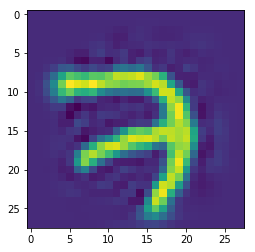

In [14]:
plt.imshow(x_recoverd[0].reshape(28, 28))

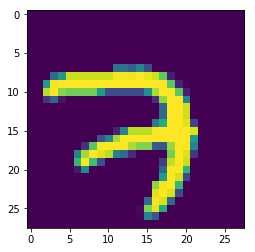

In [15]:
plt.imshow(x_train[0].reshape(28, 28))

### IPCA(Incremental PCA)

In [16]:
from sklearn.decomposition import IncrementalPCA

n_batchs = 100
inc_pca = IncrementalPCA(n_components= 160)
for X_batch in np.array_split(x_train, n_batchs):
    inc_pca.partial_fit(X_batch)

x_reduced = inc_pca.transform(x_train)

### Random PCA

In [17]:
# If d << n -> faster than previous algorithms 
rnd_pca = PCA(n_components= 160, svd_solver= "randomized")
x_reduced = rnd_pca.fit_transform(x_train)

## Kernel PCA

In [18]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
x_reduced = rbf_pca.fit_transform(x_train)

### Kernel selection and hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma":np.linspace(0.03, 0.05, 10),
    "kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_train, y_train)

In [25]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                   fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x_train)
x_preimage = rbf_pca.inverse_transform(x_reduced)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_train, x_preimage)

0.06111382

## Other Dimesion reduction method

In [27]:
# Multidimension scaling
# Isomap
# T-SNE
# LDA